Check the input file for issues, so far I see the following
(1) do they list any league more than once?
(2) should I ask about more options?
(3) do they want to curl in more open leagues than they list?

In [1]:
%reset -f

In [2]:
import pandas as pd
import numpy as np
import random
import math
import csv
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#updated 8/30/2016 to use file from website
fName = 'BackupList_Registrations.csv' 
#fName = 'registrations_KL_forPython.csv'
importInfo=pd.read_csv(fName)

In [4]:
openLeagues = ['Sunday Night', 'Monday 4PM', 'Monday Night',
               'Tuesday 4PM','Wednesday 4PM','Thursday 4PM'] #updated to match the priority list
otherLeagues = ['League_4_Men', 'League_7_Ladies' ,'League_Scrod']
priorities = ['League_Pri_1','League_Pri_2','League_Pri_3','League_Pri_4','League_Pri_5','League_Pri_6']

regInfo = importInfo.loc[:,(['firstname','lastname','email','League_Number_Open'] + otherLeagues)]

for item in openLeagues:
    regInfo[item] = np.nan

nPeople = len(regInfo.index)
for idx in range(0,nPeople):
    for idxP in enumerate(priorities):
        #remember: enumerate will allow idxP[0] is the number, while idxP[1] is the value
        getOne = importInfo.loc[idx,idxP[1]]
        if getOne != 'None':
            regInfo.loc[idx,getOne] = idxP[0] + 1  #want 1,2,3 and not python zero index

In [5]:
#if we only consider the 4 pm leagues
only4pm = ['Monday 4PM','Tuesday 4PM','Wednesday 4PM','Thursday 4PM']

In [6]:
len(regInfo)

184

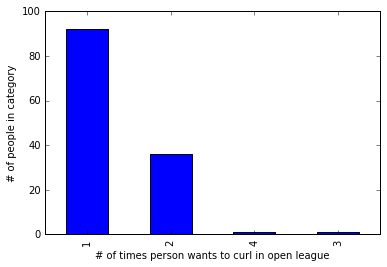

In [7]:
tData = regInfo.replace(to_replace='None', value=0)
toPlot = tData.loc[:,'League_Number_Open'].value_counts()

#drop the zeros...seems crazy, but can't really index into a series easily
toPlot = toPlot[~toPlot.index.isin([0])]

toPlot.plot(kind = 'bar')
plt.xlabel('# of times person wants to curl in open league')
plt.ylabel('# of people in category')

In [8]:
toPlot

1    92
2    36
4     1
3     1
Name: League_Number_Open, dtype: int64

In [9]:
regPlot = importInfo.loc[:,(['firstname','lastname','email','League_Number_Open'] + otherLeagues)]

for item in openLeagues:
    regPlot[item] = np.nan

nPeople = len(regPlot.index)
for idx in range(0,nPeople):
    for idxP in enumerate(priorities):
        #remember: enumerate will allow idxP[0] is the number, while idxP[1] is the value
        getOne = importInfo.loc[idx,idxP[1]]
        if getOne != 'None':
            regPlot.loc[idx,getOne] = 1  

#little misleading bc people are listing multiple options        

In [10]:
d = {'Sunday Night': np.nan,
     'Monday 4PM': np.nan,
     'Monday Night': np.nan,
     'Tuesday 4PM': np.nan,
     'Wednesday 4PM': np.nan,
     'Thursday 4PM': np.nan,}

gather = pd.DataFrame({'nFirst' : d,'nSecond' :d,'nThird' :d,'nFourth':d,'nFifth':d})

In [11]:
for name in openLeagues:
    gather.loc[name,'nFirst'] = len(regInfo.loc[regInfo[name]==1])
    gather.loc[name,'nSecond'] = len(regInfo.loc[regInfo[name]==2])
    gather.loc[name,'nThird'] = len(regInfo.loc[regInfo[name]==3])
    gather.loc[name,'nFourth'] = len(regInfo.loc[regInfo[name]==4])
    gather.loc[name,'nFifth'] = len(regInfo.loc[regInfo[name]==5])
    gather.loc[name,'nSixth'] = len(regInfo.loc[regInfo[name]==6])

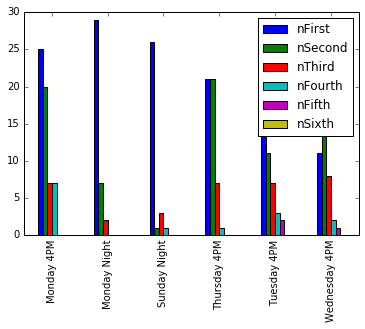

In [12]:
#otherwise will list the values in alphabetical order
gather.loc[:,['nFirst','nSecond','nThird','nFourth','nFifth','nSixth']].plot(kind = 'bar')

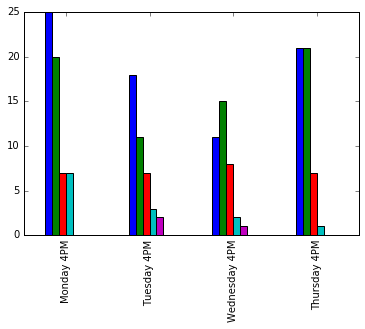

In [17]:
#otherwise will list the values in alphabetical order
gather.loc[only4pm,['nFirst','nSecond','nThird','nFourth','nFifth','nSixth']].plot(kind = 'bar',legend = False)

In [14]:
#another way to do this:
countFirst = {}
for name in openLeagues:
    countFirst[name] = len(regInfo.loc[regInfo[name]==1])

countFirst

{'Monday 4PM': 25,
 'Monday Night': 29,
 'Sunday Night': 26,
 'Thursday 4PM': 21,
 'Tuesday 4PM': 18,
 'Wednesday 4PM': 11}

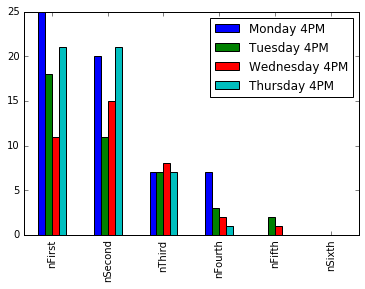

In [15]:
gather.loc[only4pm,['nFirst','nSecond','nThird','nFourth','nFifth','nSixth']].T.plot(kind = 'bar')

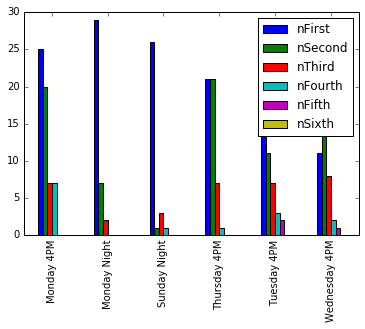

In [16]:
gather.loc[:,['nFirst','nSecond','nThird','nFourth','nFifth','nSixth']].plot(kind = 'bar')